In [1]:
library(fields)
library(rasterImage)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-4 (2018-04-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps
See www.image.ucar.edu/~nychka/Fields for
 a vignette and other supplements. 
Loading required package: plotrix

Attaching package: ‘plotrix’

The following object is masked from ‘package:fields’:

    color.scale



In [2]:
files<-c('~/Desktop/out0507_1.rda','~/Desktop/out0507_2.rda','~/Desktop/out0507_3.rda','~/Desktop/out0507_4.rda','~/Desktop/out0507_5.rda','~/Desktop/out0507_6.rda','~/Desktop/out0507_7.rda','~/Desktop/out0507_8.rda')

In [3]:
N<-c()
for (i in files) {
    
    load(i)
    N <- append(N,nclsot)
    
}

In [4]:
N_arc <- N
N <- simplify2array(N)
N_av <- matrix(data=NA,nrow=17,ncol=25)
for (j in 1:25) {
    for (i in 1:17) {

        N_av[i,j] <- mean(N[i,seq(1,200,25)+(j-1)])

    }
}

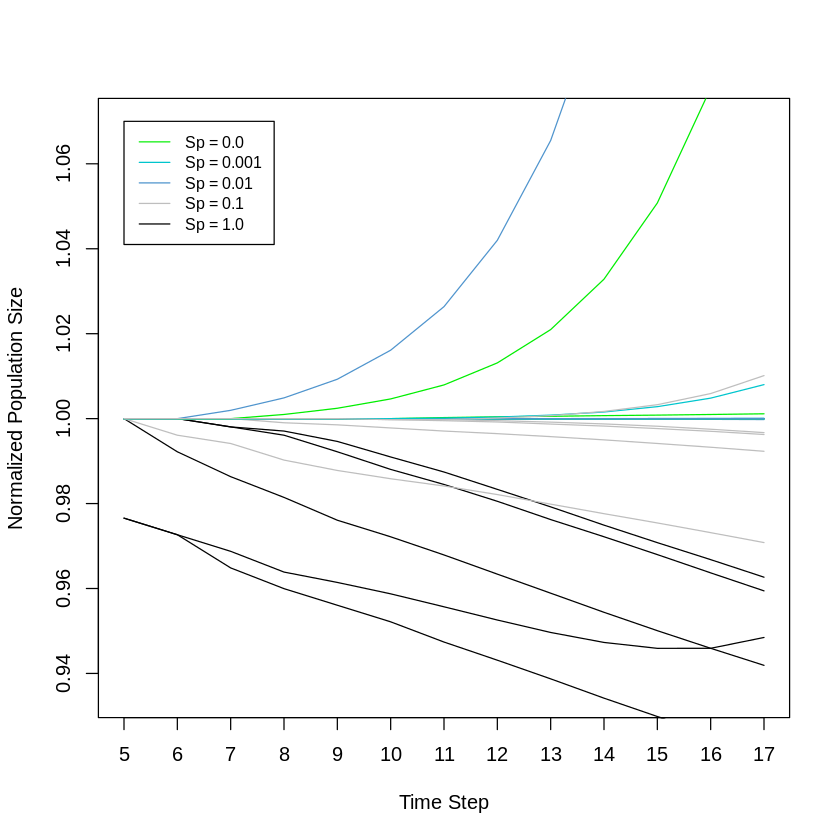

In [6]:
# pdf('test2.pdf')
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(N_av[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Time Step')
# plot(tail(nclsot[[1]],n=13))
cols = c(rep(colscheme,5))
for (i in 1:25) {
    lines(tail(N_av[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))
legend(1, 1.07, legend=c("Sp = 0.0", "Sp = 0.001", "Sp = 0.01", "Sp = 0.1", "Sp = 1.0"),
       col=c("green2","turquoise3","steelblue3","grey","black"), lty=1, cex=0.8)
# dev.off()

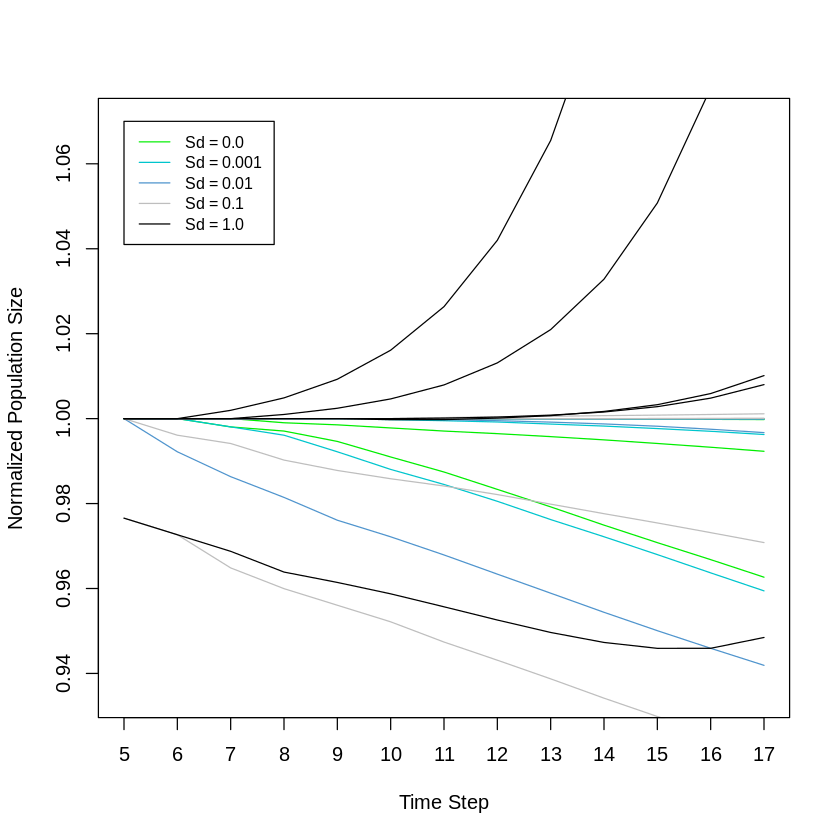

In [7]:
# pdf('test2.pdf')
colscheme = c("green2","turquoise3","steelblue3","grey","black")
plot(tail(N_av[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Time Step')
# plot(tail(nclsot[[1]],n=13))
# cols = c(rep(colscheme,5))
cols = c(rep("green2",5),rep("turquoise3",5),rep("steelblue3",5),rep("grey",5),rep("black",5))

for (i in 1:25) {
    lines(tail(N_av[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))
legend(1, 1.07, legend=c("Sd = 0.0", "Sd = 0.001", "Sd = 0.01", "Sd = 0.1", "Sd = 1.0"),
       col=c("green2","turquoise3","steelblue3","grey","black"), lty=1, cex=0.8)
# dev.off()

In [8]:
N_av[,seq(1,25,5)+4]

1.000,1.000,1.000,1.000,1.000
2.750,2.875,2.500,2.625,2.625
5.125,4.750,4.000,4.750,4.375
8.000,8.000,8.000,7.875,7.875
16.000,16.000,16.000,15.625,15.625
32.000,32.000,31.750,31.125,31.125
63.875,63.875,63.125,61.750,62.000
127.625,127.500,125.625,122.875,123.375
254.625,254.000,249.875,244.750,246.125
507.375,505.875,497.750,487.500,490.875
1011.125,1008.125,991.125,970.125,978.625


In [9]:
NavPass <-matrix(1,17,5)
    
NavPass[,1] <- rowSums(N_av[,1:5])/5
NavPass[,2] <- rowSums(N_av[,6:10])/5
NavPass[,3] <- rowSums(N_av[,11:15])/5
NavPass[,4] <- rowSums(N_av[,16:20])/5
NavPass[,5] <- rowSums(N_av[,21:25])/5


In [10]:
NavPass <-matrix(1,17,5)
pts <- c(1,6,11,16,21)
for (i in 0:4) {
    if (i!=2) {
        NavPass[,i+1] <- rowSums(N_av[,seq(1,25,5)+i])/5
    }
    else {
        NavPass[,i+1] <- rowSums(N_av[,c(3,8,13,18)])/4
    }
    
}

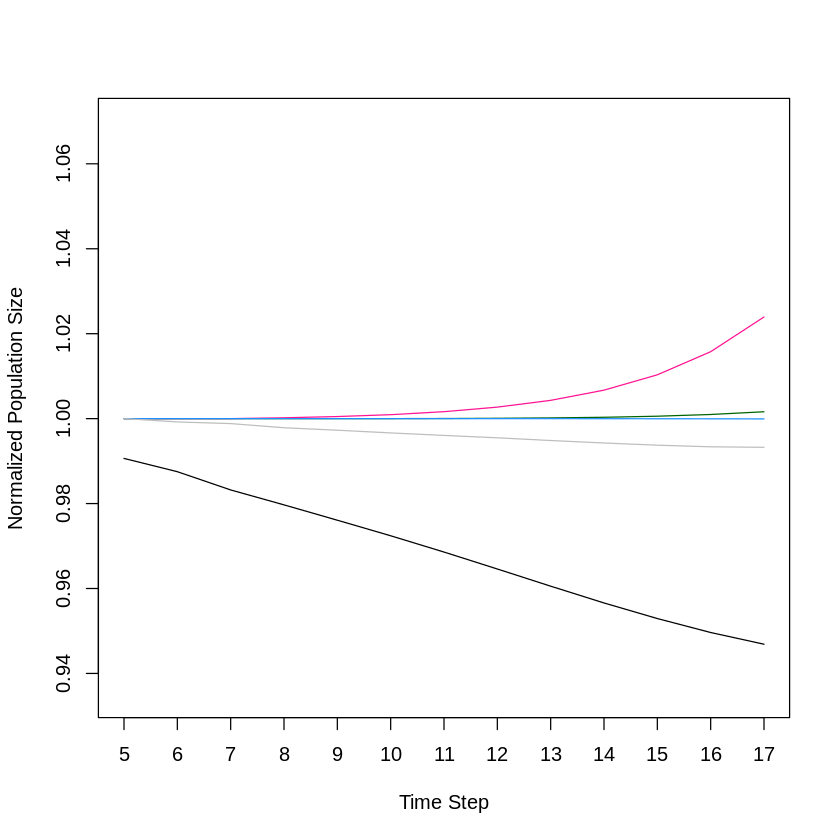

In [11]:
colscheme = c("deeppink","darkgreen","dodgerblue","grey","black")
plot(tail(NavPass[,1],n=13)/(2^c(4:16)),type='n',ylim=c(0.935,1.07),xaxt='n',ylab='Normalized Population Size',xlab='Time Step')
# plot(tail(nclsot[[1]],n=13))
cols = c(rep(colscheme,5))
# cols = c(rep("deeppink",5),rep("darkgreen",5),rep("dodgerblue",5),rep("grey",5),rep("black",5))
for (i in 1:5) {
    lines(tail(NavPass[,i],n=13)/(2^c(4:16)),col=cols[i],xaxt='n')
#     lines(tail(nclsot[[i]],n=13))
}
axis(1, at = seq(1,13,1),labels=seq(5,17,1))

In [12]:
Nt<-c()
for (i in files) {
    
    load(i)
    Nt <- append(Nt,nclst)
    
}

In [13]:
Nt <- matrix(Nt,nrow=8,ncol=25,byrow=TRUE)

In [14]:
Ntav <- c()
for (i in 1:25) {
    Ntav[i] <- mean(unlist(Nt[,i]))
}

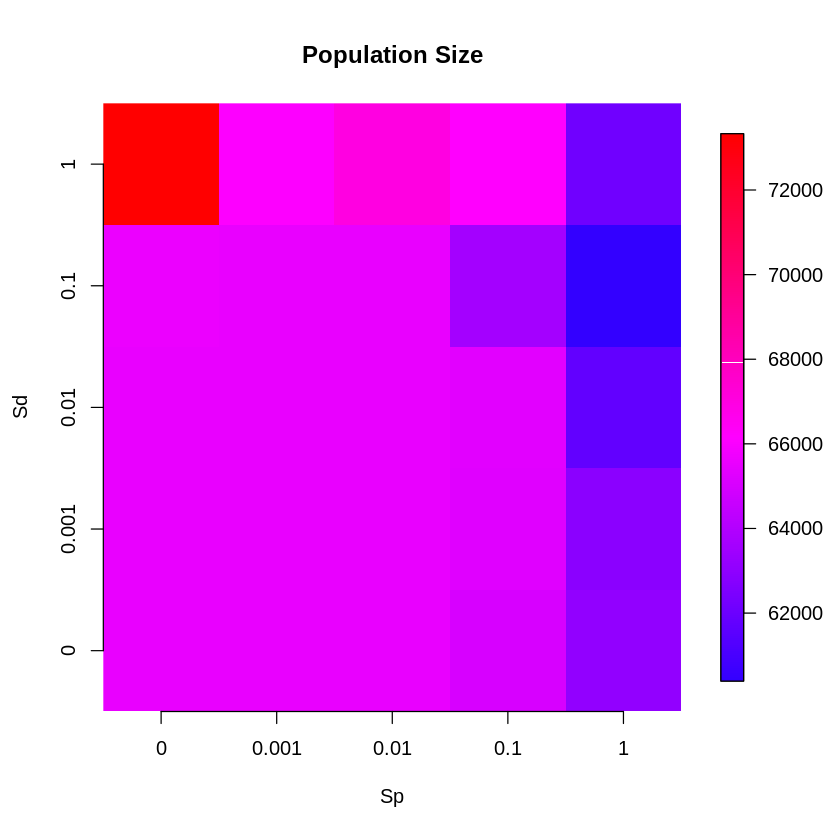

In [21]:
# pdf('rasterPopSize.pdf')
rotate <- function(x) t(apply(x, 2, rev))
n=256
cols = rainbow(n, s = 1, v = 1, start = 0.7, end = 0, alpha = 1)
image.plot(rotate(apply(matrix(Ntav[1:25],nrow=5,ncol=5,byrow=TRUE),2,rev)),axes=F,col=cols)

title(main="Population Size",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
axis(2, at=seq(0,1,0.25), labels=c(0.0,0.001,0.01,0.1,1.0)); 
# dev.off()

In [77]:
test <- t(rotate(matrix(Ntav[1:25],nrow=5,ncol=5,byrow=TRUE)))
test

73304.62,66060.75,67000.00,66199.75,62158.88
65610.38,65540.62,65537.62,63623.12,60418.12
65536.00,65536.00,65534.88,65319.75,61728.62
65536.00,65536.00,65533.12,65290.88,62877.88
65536.00,65535.88,65521.25,65031.88,63088.88


In [78]:
gna<-c()
for (i in files) {
    
    load(i)
    gna <- append(gna,gns)
    
}

In [79]:
for (i in 1:200) {
    
    gna[[i]] <- length(which(!as.logical(gna[[i]]$tsg)))/length(which(as.logical(gna[[i]]$tsg)))
    
}

In [82]:
color.hist()

ERROR: Error in color.hist(): could not find function "color.hist"


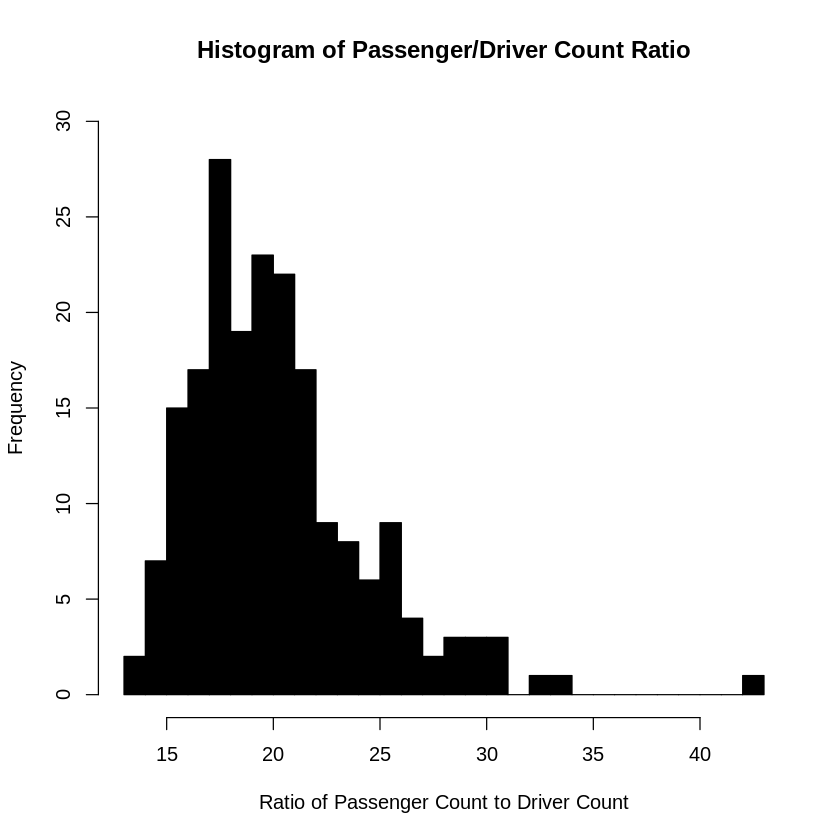

In [94]:
# pdf('pass_driv_hist.pdf')
hist(unlist(gna),breaks=25,main="Histogram of Passenger/Driver Count Ratio",xlab="Ratio of Passenger Count to Driver Count",col=1,ylim=c(0,30))
# dev.off()